In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [5]:
# Load samples from here links/scratch/score_models/Conditional_Diffusion_Experiment/samples_for_plotting.pt
dm_samples = torch.load('../Conditional_Diffusion_Experiment/samples_for_plotting.pt')

In [6]:
# Repeat function from DM but now for VAE
path_to_vae = '../Conditional_VAE_Experiment/'

# Get samples 

SyntaxError: unmatched ')' (3442355267.py, line 2)

In [ ]:
# Plot a 2 x 10 plot --> Top rows are from VAE and bottom row is from Diffusion model. Make it a 10x6 plot

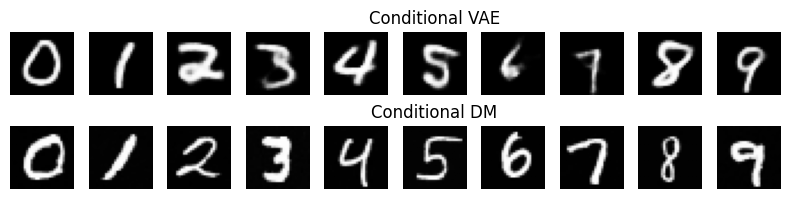

In [28]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# ---- Load samples from both models ----------------------------------------

# Diffusion model samples (already saved)
dm_samples = torch.load('../Conditional_Diffusion_Experiment/samples_for_plotting.pt')  # shape (10, H, W) or (10, 1, H, W)

# VAE samples directory
path_to_vae = '../Conditional_VAE_Experiment/samples_of_{}s.pt'

vae_samples = []
for digit in range(10):
    all_samples = torch.load(path_to_vae.format(digit))  # shape: (N, 1, H, W) or (N, H, W)
    all_samples = all_samples.squeeze()  # remove channel if present
    if all_samples.dim() == 3:  # (N, H, W)
        pass
    elif all_samples.dim() == 4 and all_samples.size(1) == 1:  # (N, 1, H, W)
        all_samples = all_samples.squeeze(1)
    else:
        raise ValueError("Unexpected shape for VAE digit samples.")

    # Randomly select one sample per digit
    idx = np.random.default_rng(123).choice(all_samples.size(0))
    vae_samples.append(all_samples[idx])

vae_samples = torch.stack(vae_samples)  # shape (10, H, W)
dm_samples = dm_samples.squeeze()       # ensure shape (10, H, W)

# ---- Plotting -------------------------------------------------------------

fig, axes = plt.subplots(nrows=2, ncols=10, figsize=(8, 5))

# Titles for top row
for j in range(10):
    axes[0, j].imshow(vae_samples[j].cpu().numpy(), cmap='gray')
    axes[0, j].axis('off')
    if j == 5:
        axes[0, j].set_title('Conditional VAE', fontsize=12)

# Bottom row: diffusion model
for j in range(10):
    axes[1, j].imshow(dm_samples[j].cpu().numpy(), cmap='gray')
    axes[1, j].axis('off')
    if j == 5:
        axes[1, j].set_title('Conditional DM', fontsize=12)

# Labels
axes[0, 0].set_ylabel('VAE', fontsize=14)
axes[1, 0].set_ylabel('DM', fontsize=14)

plt.tight_layout()
plt.subplots_adjust(hspace=-0.75)
plt.savefig("Conditional_Gen_Models.png")
plt.savefig("Conditional_Gen_Models.pdf", bbox_inches='tight', pad_inches=0.0)
plt.show()